In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
with open("clean_data/train_test_splilts.pkl","rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [3]:
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)


X_train : (2666, 64)
X_test : (667, 64)


In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
model = Sequential([
    Dense(32, activation='relu', input_shape = (64,)),
    Dropout(0.4),
    #Droput - helps to avoid overfitting 
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Here adam handles as the gd & backpropagation
- Adam decides how to update weights and biases
- So forward pass happens per batch and prediction are made and the difference from the actul are calculated
- then backpropagation where we recalculate the weight and bias 
- the epochs runs
- ~ 50 × (number_of_rows ÷ batch_size) updates are done

In [7]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs = 50,
                    batch_size=32)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7952 - loss: 0.5132 - val_accuracy: 0.8561 - val_loss: 0.4154
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.4241 - val_accuracy: 0.8561 - val_loss: 0.3956
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8548 - loss: 0.4073 - val_accuracy: 0.8561 - val_loss: 0.3803
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8545 - loss: 0.3930 - val_accuracy: 0.8561 - val_loss: 0.3692
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8545 - loss: 0.3717 - val_accuracy: 0.8561 - val_loss: 0.3583
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3693 - val_accuracy: 0.8561 - val_loss: 0.3512
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3591 - val_accuracy: 0.8561 - val_loss: 0.3444
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8563 - loss: 0.3498 - val_accuracy: 0.8576 - val_loss:

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8921 - loss: 0.2619 
Test Accuracy: 0.8921


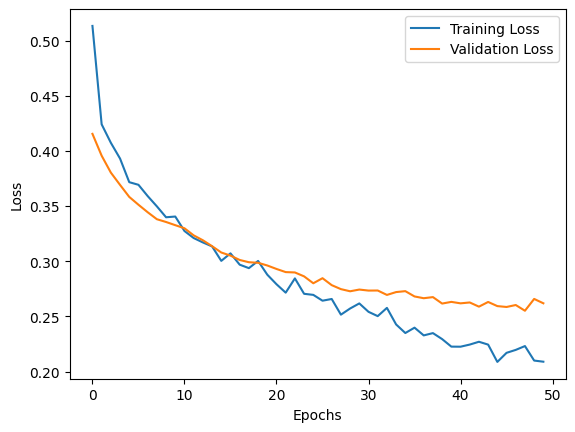

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

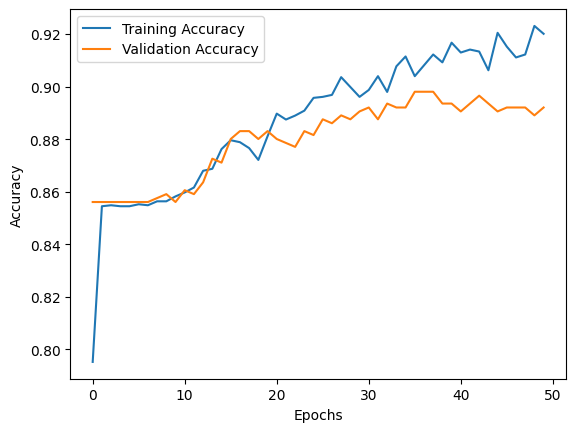

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From both the gap we see a slight overfitting but from training acc. & validation acc. there is only a slight gap which means <br>
the model doesnt memorize the training data entirely.

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = (model.predict(X_test) > 0.5).astype(int) #threshold

print(f"Test Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 0.8921
Confusion Matrix:
 [[559  12]
 [ 60  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       571
           1       0.75      0.38      0.50        96

    accuracy                           0.89       667
   macro avg       0.83      0.68      0.72       667
weighted avg       0.88      0.89      0.88       667

